# Load Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import KFold, train_test_split, GridSearchCV


# Import Data

In [39]:
X_train = pd.read_csv('0_X_train.csv', index_col='Id')
X_valid = pd.read_csv('1_X_valid.csv', index_col='Id')
X_test  = pd.read_csv('2_X_test.csv', index_col='Id')

y_train = pd.read_csv('0_y_train.csv', index_col='Id')
y_valid = pd.read_csv('1_y_valid.csv', index_col='Id')
y_test  = pd.read_csv('2_y_test.csv', index_col='Id')

num_vars = ['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']

# Decision Trees

## Create full tree

In [40]:
tree_full = DecisionTreeClassifier(criterion='entropy')#gini entropy
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Plot Full tree

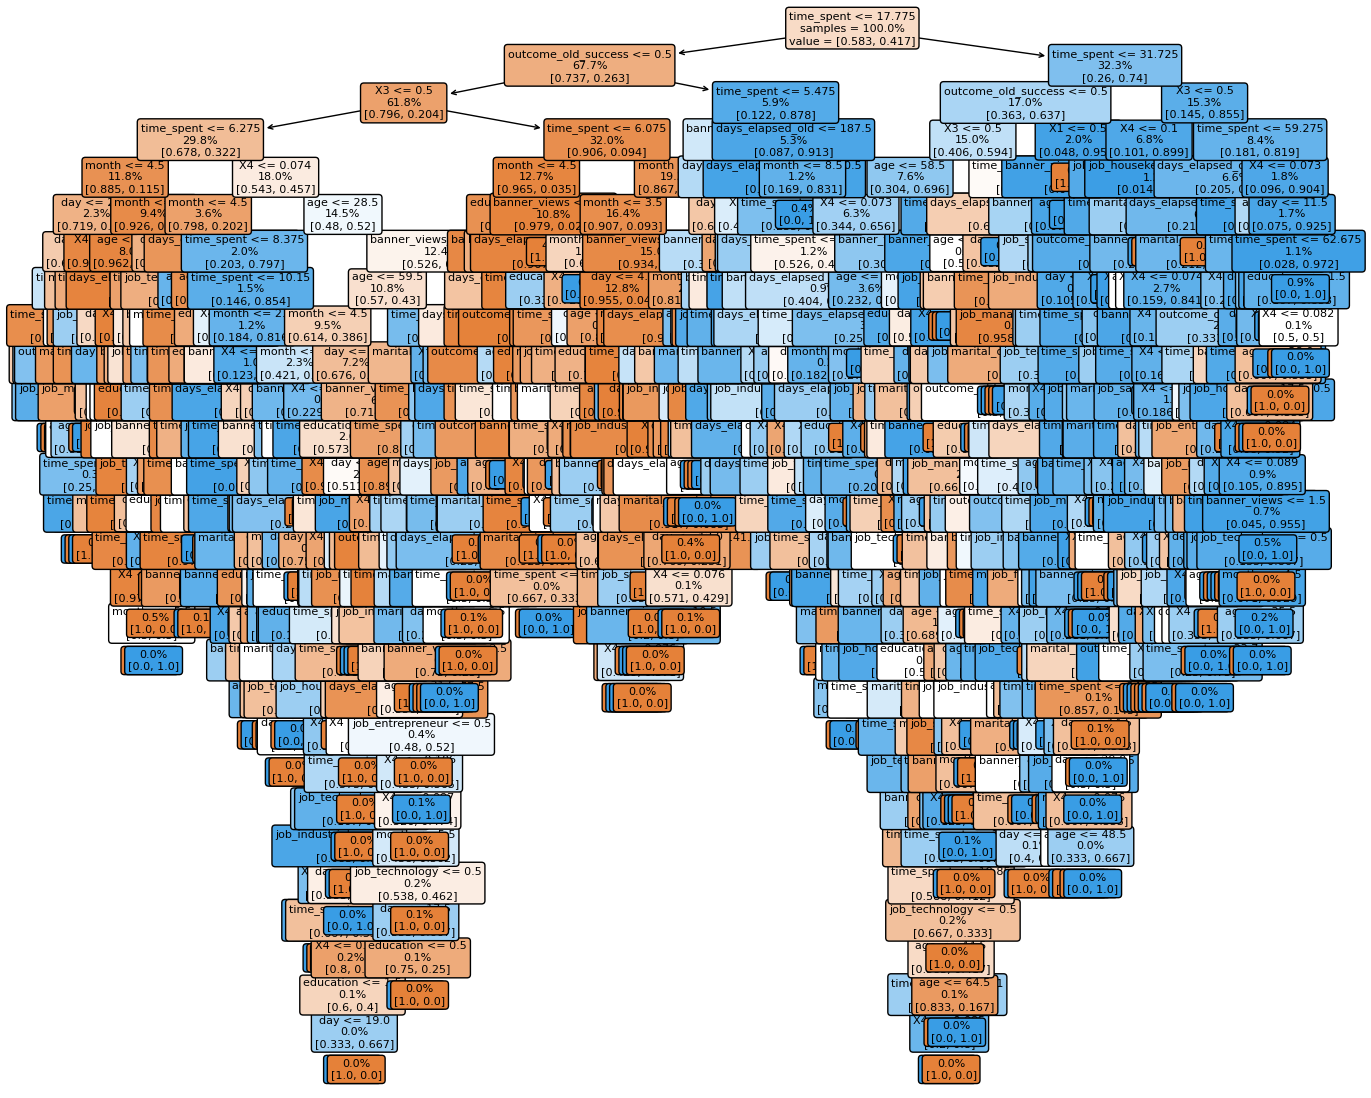

In [41]:
plt.figure(figsize=(16,14))
plot_tree(tree_full, feature_names=X_train.columns.tolist(), impurity=False, label="root",
          filled=True, proportion=True, rounded=True, fontsize=8)
#filled is for adding color
#rounded is for edges
#proportion is to give the amount in relative numbers
plt.show()

## Measure Error

In [42]:
#fully grown tree is like k nearest neighbor with 1 neighbor
print("Train accuracy:", tree_full.score(X_train,y_train))
print("Validation accuracy:", tree_full.score(X_valid,y_valid))
print("Test accuracy:", tree_full.score(X_test,y_test))


Train accuracy: 1.0
Validation accuracy: 0.7900223380491437
Test accuracy: 0.7758749069247952


## Find Best tree

In [43]:
path = tree_full.cost_complexity_pruning_path(X_train, y_train)
#this function applies penalized fitting. slide 10 of the presentation.
#changes the value of alpha so that it prunes the tre and it returns values where the splits actually change

ccp_alphas, impurities = path.ccp_alphas, path.impurities #store to variables

In [44]:
grid_alphas = ccp_alphas
grid_alphas = np.logspace(-5,1,100) 

In [45]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 69)
tree_full = DecisionTreeClassifier(criterion = "entropy", ccp_alpha = 0)
hyper_params = {"ccp_alpha": grid_alphas}

#no need to scale as the data as the splits do not depend on the comparison between variable range
treeCV = GridSearchCV(estimator = tree_full,
                      scoring = "accuracy",
                      param_grid = hyper_params,
                      cv = folds)

In [46]:
treeCV.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=69, shuffle=True),
             estimator=DecisionTreeClassifier(ccp_alpha=0, criterion='entropy'),
             param_grid={'ccp_alpha': array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.3366992...
       4.03701726e-01, 4.64158883e-01, 5.33669923e-01, 6.13590727e-01,
       7.05480231e-01, 8.11130831e-01, 9.32603347e-01, 1.07226722e+00,
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01])},
             scoring='accuracy')

In [47]:
pd.DataFrame(treeCV.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055942,0.011043,0.005608,0.002020,0.00001,{'ccp_alpha': 1e-05},0.783094,0.738437,0.771930,0.791069,0.805423,0.813397,0.753994,0.789137,0.805112,0.771565,0.782316,0.022571,47
1,0.059704,0.011411,0.005279,0.002282,0.000011,{'ccp_alpha': 1.1497569953977357e-05},0.791069,0.751196,0.775120,0.795853,0.808612,0.821372,0.757188,0.808307,0.801917,0.776358,0.788699,0.021946,16
2,0.056734,0.011652,0.004430,0.002083,0.000013,{'ccp_alpha': 1.3219411484660286e-05},0.778309,0.752791,0.767145,0.789474,0.794258,0.814992,0.752396,0.805112,0.806709,0.773163,0.783435,0.021120,41
3,0.063144,0.013790,0.005204,0.001515,0.000015,{'ccp_alpha': 1.5199110829529332e-05},0.779904,0.749601,0.770335,0.792663,0.800638,0.816587,0.765176,0.792332,0.806709,0.777955,0.785190,0.019397,30
4,0.047516,0.005374,0.003664,0.000843,0.000017,{'ccp_alpha': 1.747528400007683e-05},0.778309,0.767145,0.770335,0.789474,0.791069,0.810207,0.753994,0.801917,0.811502,0.773163,0.784711,0.018331,35


In [48]:
resCV = treeCV.cv_results_

test_Misclasif = 1 - resCV["mean_test_score"]
std_mean_err_test = resCV["std_test_score"] / np.sqrt(10)
alpha_grid = resCV["param_ccp_alpha"].data

index_best = treeCV.best_index_
best_alpha = treeCV.best_params_["ccp_alpha"]
#need to check that the misclassification error is smaller than a threshold
one_se_rule_best_alpha = np.max(alpha_grid[test_Misclasif <= test_Misclasif[index_best] + std_mean_err_test[index_best]])

print("Best alpha:", best_alpha)
print("Best 1se alpha:", one_se_rule_best_alpha)

Best alpha: 0.0015199110829529332
Best 1se alpha: 0.0023101297000831605


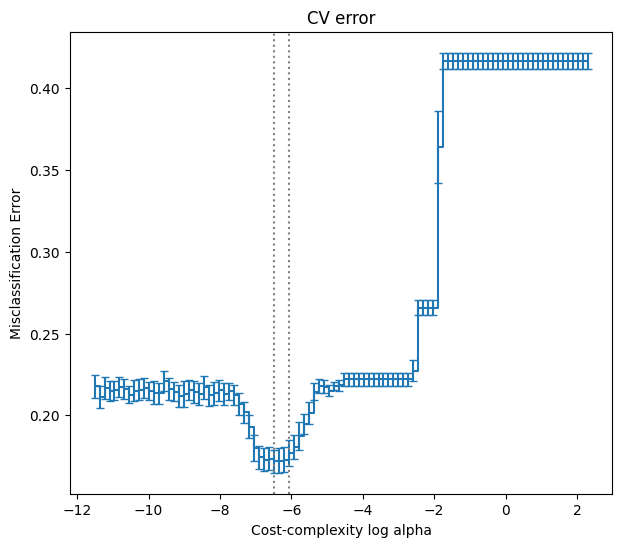

In [49]:
plt.figure(figsize=(7,6))
plt.errorbar(x=np.log(grid_alphas), y=test_Misclasif, yerr=std_mean_err_test, capsize=3, drawstyle="steps-post")#, fmt='o'

plt.axvline(np.log(best_alpha), ls='dotted', color="grey")#vertical line at the k yielding minimum CV MSE
plt.axvline(np.log(one_se_rule_best_alpha), ls='dotted', color="grey")#vertical line at best k value according to 1 std err rule

plt.title("CV error")
plt.xlabel('Cost-complexity log alpha')
plt.ylabel('Misclassification Error')
plt.show()

## Create Best Tree


In [50]:
#tree_best = treeCV.best_estimator_
#or:
tree_best_1se = DecisionTreeClassifier(criterion='entropy', ccp_alpha=one_se_rule_best_alpha).fit(X_train,y_train)
tree_best = DecisionTreeClassifier(criterion='entropy', ccp_alpha=best_alpha).fit(X_train,y_train)

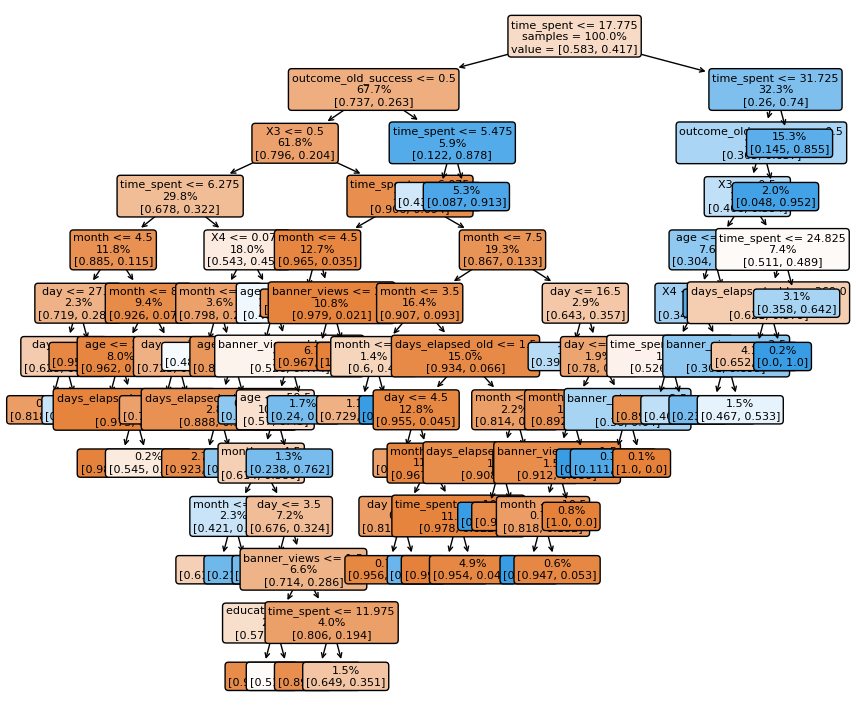

In [51]:
plt.figure(figsize=(10,9))
plot_tree(tree_best, feature_names=X_train.columns.tolist(), impurity=False, label="root",
          filled=True, proportion=True, rounded=True, fontsize=8)
plt.show()

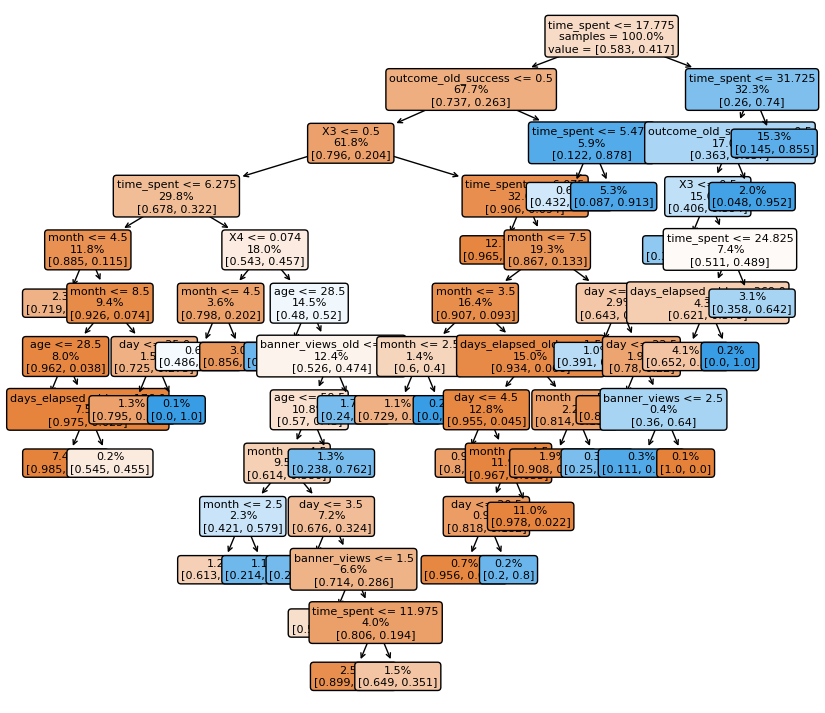

In [52]:
plt.figure(figsize=(10,9))
plot_tree(tree_best_1se, feature_names=X_train.columns.tolist(), impurity=False, label="root",
          filled=True, proportion=True, rounded=True, fontsize=8)
plt.show()

In [53]:
#feature importance
tree_best.feature_importances_

array([0.03508169, 0.00416277, 0.        , 0.04662783, 0.10806366,
       0.45081848, 0.02130986, 0.00977309, 0.02798809, 0.        ,
       0.        , 0.08741618, 0.02200332, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18675504,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

## Measure error for Best Tree

In [54]:
#fully grown tree is like k nearest neighbor with 1 neighbor
print("Train accuracy:", tree_best.score(X_train,y_train))
print("Validation accuracy:", tree_best.score(X_valid,y_valid))
print("Test accuracy:", tree_best.score(X_test,y_test))

Train accuracy: 0.8495052665177146
Validation accuracy: 0.8160833953834699
Test accuracy: 0.8451228592702904


In [55]:
#fully grown tree is like k nearest neighbor with 1 neighbor
print("Train accuracy:", tree_best_1se.score(X_train,y_train))
print("Validation accuracy:", tree_best_1se.score(X_valid,y_valid))
print("Test accuracy:", tree_best_1se.score(X_test,y_test))

Train accuracy: 0.8428024257899777
Validation accuracy: 0.8145941921072226
Test accuracy: 0.8436336559940432


In [56]:
y_pred = tree_best.predict(X_valid)

In [57]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [58]:
%store y_pred

Stored 'y_pred' (ndarray)


# Bagging/Boosting